In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
# import numpy as np
import string
%matplotlib inline

movies = pd.read_csv(
    'data/movies_cleaned.csv'
)

In [ ]:
def producer_budget(df):
    """
    This function takes the movies dataframe and creates a box plot comparing
    movie budgets between high and low ROI producers.
    """
    # Filtering data for High and Low ROI producers, then removing any movie duplicates.
    df_clean = df.dropna(axis=0,
                         subset=['producer_rank']).drop_duplicates('movie_id')
    sns.set_context('talk')
    sns.set_style('whitegrid')
    colors = {
        'High ROI Producers': '#377eb8',
        'Low ROI Producers': '#ff7f00'
    }
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(data=df_clean,
                x='producer_rank',
                y='budget',
                showfliers=False,
                order=['High ROI Producers', 'Low ROI Producers'],
                width=0.4,
                palette=colors)
    ax.set(title='High ROI Producers Keep Budgets Low',
           ylabel='Budget (in millions)',
           xlabel=None,
           xticklabels=['High ROI\nProducers', 'Low ROI\nProducers'])
    ax.yaxis.set_major_formatter(lambda x, pos: f'${int(x/1000000)}')


producer_budget(movies)
plt.savefig('./images/budgets_viz.jpg')

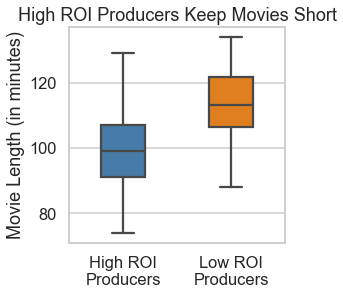

In [35]:
def producer_runtime(df):
    """
    This function takes the movies dataframe and creates a box plot comparing
    movie lengths between high and low ROI producers.
    """
    # Filtering data for High and Low ROI producers, then removing any movie duplicates.
    df_clean = df.dropna(axis=0,
                         subset=['producer_rank']).drop_duplicates('movie_id')
    sns.set_context('talk')
    sns.set_style('whitegrid')
    colors = {
        'High ROI Producers': '#377eb8',
        'Low ROI Producers': '#ff7f00'
    }
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(data=df_clean,
                x='producer_rank',
                y='runtime',
                showfliers=False,
                order=['High ROI Producers', 'Low ROI Producers'],
                width=0.4,
                palette=colors)
    ax.set(title='High ROI Producers Keep Movies Short',
           ylabel='Movie Length (in minutes)',
           xlabel=None,
           xticklabels=['High ROI\nProducers', 'Low ROI\nProducers'],
           position=[0.2,0.5,0.6,0.6])


producer_runtime(movies)
plt.savefig('./images/runtime_viz.jpg')

![runtime](./images/runtime_viz.jpg)

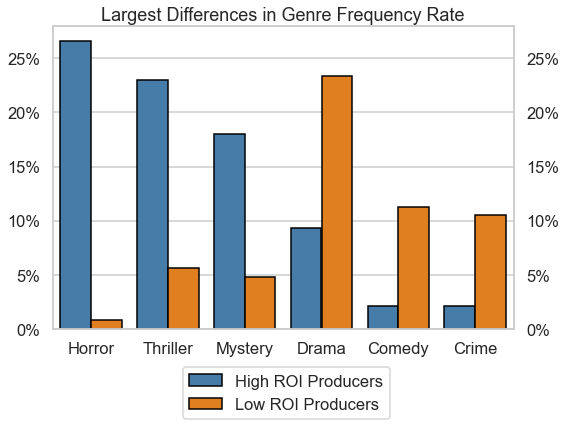

In [24]:
def producer_genre(df):
    """
    This function takes the movies dataframe makes a barchart comparing the 
    frequency rate of each genre in movies from high ROI producers, 
    low ROI producers, and all of the movies in the dataset.
    """
    # Find the most common genres and rates in each group.
    high_df = df[df['producer_rank'] == 'High ROI Producers']
    high_unique_df = high_df.drop_duplicates(['movie_id', 'genres'])
    high_rates_df = high_unique_df['genres'].value_counts(
        normalize=True).reset_index()

    low_df = df[df['producer_rank'] == 'Low ROI Producers']
    low_unique_df = low_df.drop_duplicates(['movie_id', 'genres'])
    low_rates_df = low_unique_df['genres'].value_counts(
        normalize=True).reset_index()

    # Merge data along genres.
    merged_rates_df = pd.merge(high_rates_df,
                               low_rates_df,
                               how='outer',
                               on='index').fillna(0)
    merged_named_df = merged_rates_df.rename(
        columns={
            'index': 'genre',
            'genres_x': 'High ROI Producers',
            'genres_y': 'Low ROI Producers'
        })

    # Finding the largest differnces between high and low producers.
    merged_named_df['abs_diff'] = abs(merged_named_df['High ROI Producers'] -
                                      merged_named_df['Low ROI Producers'])
    merged_sorted_df = merged_named_df.sort_values(
        'abs_diff', ascending=False).drop('abs_diff', axis=1)

    # Converting dataframe to long format, slicing to include relevant data for graphing.
    merged_long_df = merged_sorted_df.melt('genre')

    sns.set_context('talk')
    sns.set_style('whitegrid')
    colors = {'High ROI Producers': '#377eb8', 'Low ROI Producers': '#ff7f00'}
    fig, ax = plt.subplots(figsize=(8, 6))
    g = sns.barplot(
        data=merged_long_df,
        x='genre',
        y='value',
        hue='variable',
        edgecolor='black',
        palette=colors,
        order=['Horror', 'Thriller', 'Mystery', 'Drama', 'Comedy', 'Crime'])
    ax.tick_params(axis='y', labelright=True)
    plt.legend(bbox_to_anchor=(.75, -.1))
    g.yaxis.set_major_formatter(lambda x, pos: "{:.0%}".format(x))
    g.set(title='Largest Differences in Genre Frequency Rate',
          ylabel=None,
          xlabel=None,
          position=[0.1,0.23,0.8,0.7])

producer_genre(movies)
plt.savefig('./images/genre_viz.jpg')

![genres](./images/genre_viz.jpg)

In [ ]:
df=movies
high_rates_df = df[df['producer_rank'] == 'High ROI Producers'].drop_duplicates(['movie_id','genres'])['genres'].value_counts(normalize=True).reset_index()
low_rates_df = df[df['producer_rank'] == 'Low ROI Producers'].drop_duplicates(['movie_id','genres'])['genres'].value_counts(normalize=True).reset_index()

# Merge data along genres.
merged_rates_df = pd.merge(high_rates_df, low_rates_df, how='outer', on='index').fillna(0)
merged_named_df = merged_rates_df.rename(columns={'index': 'genre','genres_x': 'High ROI Producers','genres_y': 'Low ROI Producers'}) 

# Finding the largest differnces between high and low producers.
merged_named_df['abs_diff'] = abs(merged_named_df['High ROI Producers'] - merged_named_df['Low ROI Producers'])
merged_sorted_df = merged_named_df.sort_values('abs_diff', ascending=False).drop('abs_diff',axis=1)

# Converting dataframe to long format, slicing to include relevant data for graphing.
merged_long_df = merged_sorted_df.melt('genre')



In [ ]:
import pandas as pd
import string
import sqlite3

In [ ]:
the_numbers = pd.read_csv(
    'data/imported/tn.movie_budgets.csv.gz')
conn = sqlite3.connect(
    'data/imported/im.db')
q = """
SELECT 
    movie_id,
    primary_title AS title,
    start_year AS year,
    runtime_minutes AS runtime,
    primary_name AS producer,
    genres
FROM movie_basics 
JOIN principals
    USING('movie_id')
JOIN persons
    USING('person_id')
WHERE job == 'producer'
;
"""
imdb = pd.read_sql(q, conn)

In [ ]:
def prep_the_numbers(df):
    """
    This function cleans and prepares the_numbers dataframe.
    """
    # Convert currencies to integers.
    for i in ['production_budget', 'worldwide_gross']:
        df[i] = df[i].str.replace('$', '')
        df[i] = df[i].str.replace(',', '')
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].astype(int)

    # Extracting the year from 'release_date' column.
    df['year'] = pd.to_datetime(df['release_date']).dt.year

    # Norming and filtering column names
    df.rename(columns={
        'movie': 'title',
        'production_budget': 'budget'
    },
              inplace=True)
    for i in ['title']:
        df[i] = df[i].str.translate(str.maketrans('', '', string.punctuation))
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].str.lower()
    df = df[['title', 'year', 'budget', 'worldwide_gross']]
    return df


the_numbers = prep_the_numbers(the_numbers)

In [ ]:
def prep_imdb(df):
    """
    This function cleans and prepares the imdb dataframe.
    """
    # Cleaning/Norming the title names
    for i in ['title']:
        df[i] = df[i].str.translate(str.maketrans('', '', string.punctuation))
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].str.lower()
    # Expanding the comma separated genres column into one genre per row.
    df['genres'] = df['genres'].map(lambda x: x.split(','), na_action='ignore')
    df = df.explode('genres')
    return df


imdb = prep_imdb(imdb)

In [ ]:
def merge(df1, df2):
    """
    This function merges the_numbers and imdb dataframes.
    """
    df = pd.merge(df1, df2, how='inner', on=['title', 'year'])
    return df


movies = merge(the_numbers, imdb)

In [ ]:
df = movies
# Calculate and add an ROI column
profit_df = df['worldwide_gross'] - df['budget']
df['ROI'] = (profit_df / df['budget']) * 100

# Find top and bottom 5 producers by ROI, with a minimum of 7 movie credits.
producers_df = df.drop_duplicates(['movie_id', 'producer'])
producer_count_df = producers_df['producer'].value_counts()
producer_count_filtered_df = producer_count_df[producer_count_df > 6]
producer_count_filtered_list = list(producer_count_filtered_df.index)
producers_filtered_df = producers_df[producers_df['producer'].isin(
    producer_count_filtered_list)]
producers_roi_df = producers_filtered_df.groupby(
    'producer').median()['ROI'].sort_values(ascending=False)
high_roi_producers_list = list(producers_roi_df.head(5).index)
low_roi_producers_list = list(producers_roi_df.tail(5).index)

# Add a producer_rank column labeling producer groups
df.loc[df['producer'].isin(high_roi_producers_list),
       'producer_rank'] = 'High ROI Producers'
df.loc[df['producer'].isin(low_roi_producers_list),
       'producer_rank'] = 'Low ROI Producers'

In [ ]:
df

In [ ]:
def add_features(df):
    """
    This function takes the movies dataframe, calculates a ROI column, 
    finds the top and bottom producers by ROI, and labels them via a 
    producer_rank colum.
    """
    # Calculate and add an ROI column
    profit_df = df['worldwide_gross'] - df['budget']
    df['ROI'] = (profit_df / df['budget']) * 100

    # Find top and bottom 5 producers by ROI, with a minimum of 7 movie credits.
    producers_df = df.drop_duplicates(['movie_id', 'producer'])
    producer_count_df = producers_df['producer'].value_counts()
    producer_count_filtered_df = producer_count_df[producer_count_df > 6]
    producer_count_filtered_list = list(producer_count_filtered_df.index)
    producers_filtered_df = producers_df[producers_df['producer'].isin(
        producer_count_filtered_list)]
    producers_roi_df = producers_df.groupby(
        'producer').median()['ROI'].sort_values(ascending=False)
    high_roi_producers_list = list(producers_roi_df.head(5).index)
    low_roi_producers_list = list(producers_roi_df.tail(5).index)

    # Add a producer_rank column labeling producer groups
    df.loc[df['producer'].isin(high_roi_producers_list),
           'producer_rank'] = 'High ROI Producers'
    df.loc[df['producer'].isin(low_roi_producers_list),
           'producer_rank'] = 'Low ROI Producers'
    return df


add_features(movies)

In [ ]:
def prep_the_numbers(df):
    """
    This function cleans and prepares the_numbers dataframe.
    """
    # Convert currencies to integers.
    for i in ['production_budget', 'worldwide_gross']:
        df[i] = df[i].str.replace('$', '')
        df[i] = df[i].str.replace(',', '')
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].astype(int)

    # Extracting the year from 'release_date' column.
    df['year'] = pd.to_datetime(df['release_date']).dt.year

    # Norming and filtering column names
    df.rename(columns={
        'movie': 'title',
        'production_budget': 'budget'
    },
              inplace=True)
    for i in ['title']:
        df[i] = df[i].str.translate(str.maketrans('', '', string.punctuation))
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].str.lower()
    df = df[['title', 'year', 'budget', 'worldwide_gross']]
    return df


def prep_imdb(df):
    """
    This function cleans and prepares the imdb dataframe.
    """
    # Cleaning/Norming the title names
    for i in ['title']:
        df[i] = df[i].str.translate(str.maketrans('', '', string.punctuation))
        df[i] = df[i].str.replace(' ', '')
        df[i] = df[i].str.lower()
    # Expanding the comma separated genres column into one genre per row.
    df['genres'] = df['genres'].map(lambda x: x.split(','), na_action='ignore')
    df = df.explode('genres')
    return df


def merge(df1, df2):
    """
    This function merges the_numbers and imdb dataframes.
    """
    df = pd.merge(df1, df2, how='inner', on=['title', 'year'])
    return df


def add_features(df):
    """
    This function takes the movies dataframe, calculates a ROI column, 
    finds the top and bottom producers by ROI, and labels them via a 
    producer_rank colum.
    """
    # Calculate and add an ROI column
    profit_df = df['worldwide_gross'] - df['budget']
    df['ROI'] = (profit_df / df['budget']) * 100

    # Find top and bottom 5 producers by ROI, with a minimum of 7 movie credits.
    producers_df = df.drop_duplicates(['movie_id', 'producer'])
    producer_count_df = producers_df['producer'].value_counts()
    producer_count_filtered_df = producer_count_df[producer_count_df > 6]
    producer_count_filtered_list = list(producer_count_filtered_df.index)
    producers_filtered_df = producers_df[producers_df['producer'].isin(
        producer_count_filtered_list)]
    producers_roi_df = producers_df.groupby(
        'producer').median()['ROI'].sort_values(ascending=False)
    high_roi_producers_list = list(producers_roi_df.head(5).index)
    low_roi_producers_list = list(producers_roi_df.tail(5).index)

    # Add a producer_rank column labeling producer groups
    df.loc[df['producer'].isin(high_roi_producers_list),
           'producer_rank'] = 'High ROI Producers'
    df.loc[df['producer'].isin(low_roi_producers_list),
           'producer_rank'] = 'Low ROI Producers'
    return df